<a href="https://colab.research.google.com/github/JuanPedroDelCastillo/FisicaComputacional1/blob/master/Actividad7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Actividad 7**

Importar Bibliotecas

In [ ]:
import numpy as np
import scipy.linalg as la
from numpy.linalg import matrix_power as mpow

import matplotlib.pyplot as plt
%matplotlib inline

## Ejercicio 1

Defina las siguientes matrices.

\begin{equation*}
 A
 =
  \begin{bmatrix}
   1 & 3 \\
   -1 & 7
  \end{bmatrix}
\end{equation*}

$$\begin{equation*}
 B =
  \begin{bmatrix}
   5 & 2 \\
   1 & 2
   \end{bmatrix}
\end{equation*}$$
y la matrix identidad

$$\begin{equation*}
 I = 
   \begin{bmatrix}
   1 & 0 \\
   0 & 1
   \end{bmatrix}
\end{equation*}$$

Calcule el resultado de $2*I+3*A+A@B$.

In [ ]:
# Para definir una matriz:
A = np.array([[1, 3],[-1, 7]])
B = np.array([[5, 2], [1, 2]])

# Para definir la matriz identidad:
I = np.eye(2, dtype=int)

# Para realizar operaciones aritméticas:
# Las operaciones aritméticas +, -, /, * y ** se realizan elemento a elemento
# La operación @ es el producto matricial
print(2*I + 3*A + A@B)

# Potencia Matricial mpow(M, n) por ejemplo: M^3 = M@M@M se realiza mpow(M, 3)
# La matriz M y su transpuesta es con M.T
# Traza de la matriz M: np.trace(M)
# Determinante de la matriz M: la.det(M)
# Matriz inversa de M: la.inv(M)

[[13 17]
 [-1 35]]


## Ejercicio 2



**Los polinomios característicos y el Teorema de Cayley-Hamilton.**

El polinomio característico de una matriz M esta dado en general por la ecuación

$$\det(M - \lambda I) = 0
\\
$$Para una matriz cuadrada M (2x2), el polinomio característico se puede escribir como$$
P_2 (\lambda) = \det{(M)} - \mathrm{tr}(M) \, \lambda + \lambda^2   
\\
$$y para una matriz cuadrada M (3x3), el polinomio característico resulta ser

$$P_3 (\lambda) = \frac{1}{6} 
[ \mathrm{tr}^3 (M) + 2 \, \mathrm{tr }(M^3) - 3 \, \mathrm{tr}(M) \mathrm{tr}(M^2) ] - 
\frac{1}{2} [ \mathrm{tr}^2 (M) - \mathrm{tr}(M^2) ] \lambda + \mathrm{tr}(M) \lambda^2 - \lambda^3

\\
$$El Teorema de Cayley-Hamilton nos dice que una matriz cuadrada M (2x2), satisface el polinomio característico

$$P_2(M) = \det(M)I - \mathrm{tr}(M) M + M^2 

\\
$$y en general cualquier matriz cuadrada M (nxn), satisface $P_n(M)$.

Demuestre esto para cualquier matriz M (2x2), ($\det(M) \neq 0$).

***Demostración:***

Definamos la matriz M como:

\begin{equation*}
 M
 =
  \begin{bmatrix}
   a & b \\
   c & d
   \end{bmatrix}
\end{equation*}

Tenemos que la determinante de M es distinto de cero:

$$det(M)=ad-bc\neq 0$$

Desarrollando el Polinomio característico:

$$P_2(M) = \det(M)I - \mathrm{tr}(M) M + M^2$$

\begin{equation*}
 P_2(M)
 =
  (ad-bc)
  \begin{bmatrix}
   1 & 0 \\
   0 & 1
   \end{bmatrix}

   -(a+d)
   \begin{bmatrix}
   a & b \\
   c & d
   \end{bmatrix}

   +
   \begin{bmatrix}
   a & b \\
   c & d
   \end{bmatrix}
   \begin{bmatrix}
   a & b \\
   c & d
   \end{bmatrix}
\end{equation*}

\begin{equation*}
 P_2(M)
 =
  \begin{bmatrix}
   ad-bc & 0 \\
   0 & ad-bc
   \end{bmatrix}

   +
   \begin{bmatrix}
   -a^2-ad & -ab-bd \\
   -ac-cd & -ad-d^2
   \end{bmatrix}

   +
   \begin{bmatrix}
   a^2+bc & ab+bd \\
   ac+cd & bd+d^2
   \end{bmatrix}

\end{equation*}

Realizando la suma de las componentes nos queda la matriz:

\begin{equation*}
 P_2(M)
 =
  \begin{bmatrix}
   0 & 0 \\
   0 & 0
   \end{bmatrix}
\end{equation*}

## Ejercicio 3

Resuelva el sistema de ecuaciones:

\begin{eqnarray*}
x - 3 y + z =  1 \\ \nonumber
3 x - 4y + z = 5 \\ \nonumber
2 y - z = 0 \\ \nonumber
\end{eqnarray*}

de dos formas, utilizando el Método de Eliminación Gaussiana y la utilzando la función scipy.linalg.solve()

### Eliminación Gaussiana

In [ ]:
# Implementación del método de eliminación Gaussiana
# Definimos 3 funciones 

# Intercambio de posición de renglones.
def switch_rows(A,i,j):
    "Intercambiar renglones i y j en la matriz A."
    n = A.shape[0]
    E = np.eye(n)
    E[i,i] = 0
    E[j,j] = 0
    E[i,j] = 1
    E[j,i] = 1
    return E @ A

# Multiplicar un renglón por una constante no nula.
def scale_row(A,k,i):
    "Multiplicar el renglón i por k en la matriz A."
    n = A.shape[0]
    E = np.eye(n)
    E[i,i] = k
    return E @ A

# Sumar un múltiplo de un reglon a otro renglón.
def add_row(A,k,i,j):
    "Sumar k veces el renglón j al renglón i en la matriz A."
    n = A.shape[0]
    E = np.eye(n)
    if i == j:
        E[i,i] = k + 1
    else:
        E[i,j] = k
    return E @ A

In [ ]:
# Definimos la matriz M
M = np.array([[1, -3, 1], [1, -4, 1], [0, 2, -1]])
print(M)
print('det(M) = ', la.det(M))

[[ 1 -3  1]
 [ 1 -4  1]
 [ 0  2 -1]]
det(M) =  0.9999999999999998


In [ ]:
# Matriz aumentada: Unimos la matriz M con la matriz Identidad 
A = np.hstack([M,np.eye(3)])
print(A)

[[ 1. -3.  1.  1.  0.  0.]
 [ 1. -4.  1.  0.  1.  0.]
 [ 0.  2. -1.  0.  0.  1.]]


In [ ]:
# 1) L2 + -L1 ->  L2; 
A1 = add_row(A,-1,1,0)
print(A1)

[[ 1. -3.  1.  1.  0.  0.]
 [ 0. -1.  0. -1.  1.  0.]
 [ 0.  2. -1.  0.  0.  1.]]


In [ ]:
# 2) -L2 ->  L2;
A2 = scale_row(A1,-1,1)
print(A2)

[[ 1. -3.  1.  1.  0.  0.]
 [ 0.  1.  0.  1. -1.  0.]
 [ 0.  2. -1.  0.  0.  1.]]


In [ ]:
# 3) L1 + 3 L2 ->  L1;
#    L3 + -2 L2 ->  L3;
A3_tmp = add_row(A2,3,0,1)
A3 = add_row(A3_tmp,-2,2,1)
print(A3)

[[ 1.  0.  1.  4. -3.  0.]
 [ 0.  1.  0.  1. -1.  0.]
 [ 0.  0. -1. -2.  2.  1.]]


In [ ]:
# 4) L1 + L3 ->  L1;
#    -L3 ->  L3;
A4_tmp = add_row(A3,1,0,2)
A4 = scale_row(A4_tmp,-1,2)
print(A4)

[[ 1.  0.  0.  2. -1.  1.]
 [ 0.  1.  0.  1. -1.  0.]
 [ 0.  0.  1.  2. -2. -1.]]


In [ ]:
# Hemos obtenido la inversa
M_inv = A4[:,3:]
print(M_inv)

[[ 2. -1.  1.]
 [ 1. -1.  0.]
 [ 2. -2. -1.]]


In [ ]:
# Checamos la inversa de M con la función 'la.inv(M)'
la.inv(M)

array([[ 2., -1.,  1.],
       [ 1., -1.,  0.],
       [ 2., -2., -1.]])

In [ ]:
# definimos b. Recordemos que tenemos que usar la función .reshape()
b = np.array([1, 5, 0]).reshape(3,1)
print(b)

[[1]
 [5]
 [0]]


In [ ]:
# La solución es:
x = M_inv @ b 
print(x)

[[-3.]
 [-4.]
 [-8.]]


### Función scipy.linalg.solve()

In [ ]:
# Resolviendo el sistema de ecuaciones usando scipy.linalg.solve
x_sol = la.solve(M, b)
print(x_sol)

[[-3.]
 [-4.]
 [-8.]]


## Ejercicio 4

Dadas las siguientes matrices $B_1, B_2$ y $B_3$

(Ejemplos del artículo de Wikipedia sobre Eigenvalores y Eigenvectores)

\begin{equation*}
  B_1
  =
  \begin{bmatrix}
   2 & 0 & 0 \\
   0 & 3 & 4 \\
   0 & 4 & 9 \\
  \end{bmatrix}

\end{equation*}
\
\begin{equation*}
  B_2 
  = 
  \begin{bmatrix}
   0 & 1 & 0 \\
   0 & 0 & 1 \\
   1 & 0 & 0 \\
  \end{bmatrix}
\end{equation*}
\
\begin{equation*}
  B_3 
  = 
  \begin{bmatrix}
   2 & 0 & 0 & 0 \\
   1 & 2 & 0 & 0 \\
   0 & 1 & 3 & 0 \\
   0 & 0 & 1 & 3 \\
\end{bmatrix}
\\
\end{equation*}

Encuentra los eigenvalores y eigenvectores de cada matriz utilizando la función de scipy.linalg.eig(), y contrasta tus resultados en cada caso con los que se desarrollan en los ejemplos de la Wikipedia.

In [ ]:
# Definimos las matrices B1, B2, B3:
B1 = np.array([[2,0,0],[0,3,4],[0,4,9]])
B2 = np.array([[0,1,0],[0,0,1],[1,0,0]])
B3 = np.array([[2,0,0,0],[1,2,0,0],[0,1,3,0],[0,0,1,3]])

# Aplicamos la biblioteca scipy.linalg.eig()
eigvals1, eigvecs1 = la.eig(B1)
print(B1)
print('Eigenvalores de B1: \n', eigvals1)
print('Eigenvectores de B1: \n', eigvecs1)
print('\n')

eigvals2, eigvecs2 = la.eig(B2)
print('Eigenvalores de B2: \n', eigvals2)
print('Eigenvectores de B2: \n', eigvecs2)
print('\n')

eigvals3, eigvecs3 = la.eig(B3)
print(B3)
print('Eigenvalores de B3: \n', eigvals3)
print('Eigenvectores de B3: \n', eigvecs3)

print('\n')

[[2 0 0]
 [0 3 4]
 [0 4 9]]
Eigenvalores de B1: 
 [11.+0.j  1.+0.j  2.+0.j]
Eigenvectores de B1: 
 [[ 0.          0.          1.        ]
 [ 0.4472136   0.89442719  0.        ]
 [ 0.89442719 -0.4472136   0.        ]]


Eigenvalores de B2: 
 [-0.5+0.8660254j -0.5-0.8660254j  1. +0.j       ]
Eigenvectores de B2: 
 [[ 0.57735027+0.j   0.57735027-0.j  -0.57735027+0.j ]
 [-0.28867513+0.5j -0.28867513-0.5j -0.57735027+0.j ]
 [-0.28867513-0.5j -0.28867513+0.5j -0.57735027+0.j ]]


[[2 0 0 0]
 [1 2 0 0]
 [0 1 3 0]
 [0 0 1 3]]
Eigenvalores de B3: 
 [3.+0.j 3.+0.j 2.+0.j 2.+0.j]
Eigenvectores de B3: 
 [[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  2.56395025e-16]
 [ 0.00000000e+00  0.00000000e+00  5.77350269e-01 -5.77350269e-01]
 [ 0.00000000e+00  6.66133815e-16 -5.77350269e-01  5.77350269e-01]
 [ 1.00000000e+00 -1.00000000e+00  5.77350269e-01 -5.77350269e-01]]




Log eigenvectores presentados con la función son proporcionales a los presentados en wikipedia. Por lo tanto, son correctos pues existen infinitos eigenvalores paralelos o proporcionales a ellos. La función presentada te da los eigenvectores con norma 1, es decir, vectores que forman una base.

## Ejercicio 5

Se tienen los siguientes 8 puntos:

$$\begin{eqnarray*} 
(x,&y) \\
(0.0,& 0.0), \\ 
(0.5, &0.47942), \\ 
(1.0,& 0.84147), \\
(1.5,& 0.99749), \\
(2.0,& 0.90930), \\
(2.5 ,& 0.59847), \\
(3.0 ,& 0.14112), \\
(3.5 &, -0.35078)
\end{eqnarray*}$$
Encuentre un polinomio interpolante $p(x)$ que pase por los 8 puntos.

Sobreponga la función $y=\sin(x)$ y contrástela con el polinomio $p(x)$.

In [ ]:
# Matriz de Vandermonde X
x = np.array([0.0,0.5,1.0,1.5,2.0,2.5,3.0,3.5])
X = np.vander(x,increasing=True)

# El vector y
y = np.array([0.0,0.47942,0.84147,0.99749,0.90930,0.59847,0.14112,-0.35078]).reshape(8,1)

# Resolvemos la ecuación Xa = y, para los coeficientes desconocidos a
# Usamos la función scipy.linalg.solve()
a = la.solve(X,y)
print(a)

[[ 0.00000000e+00]
 [ 1.00067181e+00]
 [-3.70788889e-03]
 [-1.58867889e-01]
 [-8.30222222e-03]
 [ 1.31964444e-02]
 [-1.54488889e-03]
 [ 2.46349206e-05]]


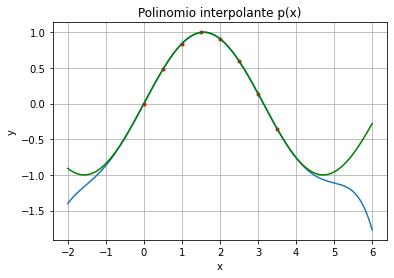

In [ ]:
# Graficamos el polinomio interpolante y los puntos interpolados
# Los puntos interpolados en rojo ('r.')
xs = np.linspace(-2,6,200)
ys = sum([a[k]*xs**k for k in range(0,8)])
ysin = np.sin(xs)
#plt.plot(x, y, 'r')
plt.plot(x,y,'r.',xs,ys)
plt.plot(xs, ysin, 'green')
plt.grid()
plt.title('Polinomio interpolante p(x)')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## Ejercicio 6

Regrese a su modelo de análisis de series de tiempo. Haga una descomposición de su serie de tiempo de las temperaturas (Tmax y Tmin), y realice una regresión lineal sobre la serie de Tendencia de Temp $(T = a_0 + a_1 t)$. Encuentre si la pendiente es positiva o negativa de la tendencia (signo de $a_1$), es decir si las Temperaturas (Tmax, Tmin) están subiendo o bajando en el periodo analizado.

## Regresión Lineal

In [ ]:
# Definimos una función para convertir datetime64 (yyyy-mm-dd) a float (yyyy.zzzz)

from datetime import datetime as dt
import time

def toYearFraction(date):
    def sinceEpoch(date): # returns seconds since epoch
        return time.mktime(date.timetuple())
    s = sinceEpoch

    year = date.year
    startOfThisYear = dt(year=year, month=1, day=1)
    startOfNextYear = dt(year=year+1, month=1, day=1)

    yearElapsed = s(date) - s(startOfThisYear)
    yearDuration = s(startOfNextYear) - s(startOfThisYear)
    fraction = yearElapsed/yearDuration

    return date.year + fraction

In [ ]:
# Guardamos la tendencia en una Serie
resTmaxTrend = resTmax.trend

# Eliminamos valores nulos
resTmaxTrend.dropna(inplace=True)

# Convertimos la Serie en un Dataframe
Trend_Tmax=pd.DataFrame({'Fecha':resTmaxTrend.index, 'Tmax':resTmaxTrend.values})

# Convertimos de datetime64 (yyyy-mm-dd) a float (yyyy.zzzz)
Trend_Tmax['Fecha']=Trend_Tmax['Fecha'].apply(toYearFraction)
print(Trend_Tmax)

# Recuento de filas N
N = Trend_Tmax.shape[0]
print(N)

# Guardamos los valores de Fecha en un vector (array) x:
x = np.array(Trend_Tmax['Fecha'])

# Guardamos los valores de Tmax en el vector (array) y:
y = np.array(Trend_Tmax['Tmax'])


            Fecha       Tmax
0     2000.497268  32.484932
1     2000.500000  32.498630
2     2000.502732  32.519178
3     2000.505464  32.531507
4     2000.508197  32.536986
...           ...        ...
5475  2015.487671  32.765753
5476  2015.490411  32.760274
5477  2015.493151  32.750685
5478  2015.495890  32.742466
5479  2015.498630  32.747945

[5480 rows x 2 columns]
5480
(5480,)


In [ ]:
# Creamos la matriz X, con 1's en la primera columna y los puntos x_k en la segunda.
X = np.column_stack([np.ones(N),x])
print('Shape:', X.shape)
# Imprimimos los primeros 5 renglones para verificar
print(X[:5,:])

Shape: (5480, 2)
[[1.00000000e+00 2.00049727e+03]
 [1.00000000e+00 2.00050000e+03]
 [1.00000000e+00 2.00050273e+03]
 [1.00000000e+00 2.00050546e+03]
 [1.00000000e+00 2.00050820e+03]]


In [ ]:
# Usamos la función scipy.linalg.solve() para resolver la ecuación X.T@X@a = X.T@y respecto a 'a'
a = la.solve(X.T @ X, X.T @ y)
print(a)

[-1.19964238e+02  7.60217750e-02]


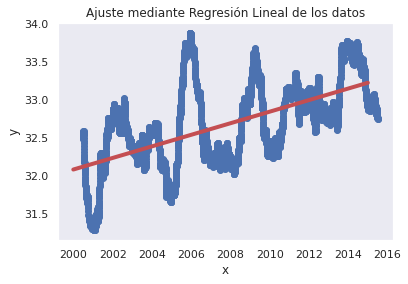

In [ ]:
# Graficamos el ajuste con esos 2 coeficientes de la regresión y = a_0 + a_1 x 
xs = np.linspace(2000,2015,10)
ys = a[0] + a[1]*xs
plt.plot(xs,ys,'r',linewidth=4)
plt.scatter(x,y);
plt.grid()
plt.title('Ajuste mediante Regresión Lineal de los datos')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [ ]:
# Guardamos la tendencia en una Serie
resTminTrend = resTmin.trend

# Eliminamos valores nulos
resTminTrend.dropna(inplace=True)

# Convertimos la Serie en un Dataframe
Trend_Tmin=pd.DataFrame({'Fecha':resTminTrend.index, 'Tmin':resTminTrend.values})

# Convertimos de datetime64 (yyyy-mm-dd) a float (yyyy.zzzz)
Trend_Tmin['Fecha']=Trend_Tmin['Fecha'].apply(toYearFraction)
print(Trend_Tmin)

# Recuento de filas N
N = Trend_Tmin.shape[0]
print(N)

# Guardamos los valores de Fecha en un vector (array) x:
x = np.array(Trend_Tmin['Fecha'])

# Guardamos los valores de Tmax en el vector (array) y:
y = np.array(Trend_Tmin['Tmin'])


            Fecha       Tmin
0     2000.497268  18.298630
1     2000.500000  18.302740
2     2000.502732  18.319178
3     2000.505464  18.332877
4     2000.508197  18.350685
...           ...        ...
5475  2015.487671  18.787671
5476  2015.490411  18.787671
5477  2015.493151  18.790411
5478  2015.495890  18.790411
5479  2015.498630  18.784932

[5480 rows x 2 columns]
5480


In [ ]:
# Creamos la matriz X, con 1's en la primera columna y los puntos x_k en la segunda.
X = np.column_stack([np.ones(N),x])
print('Shape:', X.shape)
# Imprimimos los primeros 5 renglones para verificar
print(X[:5,:])

Shape: (5480, 2)
[[1.00000000e+00 2.00049727e+03]
 [1.00000000e+00 2.00050000e+03]
 [1.00000000e+00 2.00050273e+03]
 [1.00000000e+00 2.00050546e+03]
 [1.00000000e+00 2.00050820e+03]]


In [ ]:
# Usamos la función scipy.linalg.solve() para resolver la ecuación X.T@X@a = X.T@y respecto a 'a'
a = la.solve(X.T @ X, X.T @ y)
print(a)

[-8.76615913e+01  5.28561488e-02]


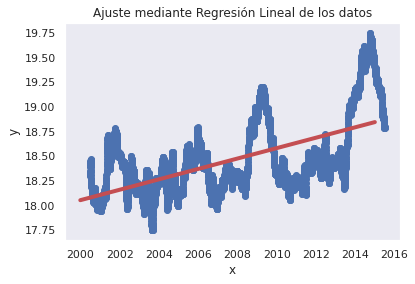

In [ ]:
# Graficamos el ajuste con esos 2 coeficientes de la regresión y = a_0 + a_1 x 
xs = np.linspace(2000,2015,10)
ys = a[0] + a[1]*xs
plt.plot(xs,ys,'r',linewidth=4)
plt.scatter(x,y);
plt.grid()
plt.title('Ajuste mediante Regresión Lineal de los datos')
plt.xlabel('x')
plt.ylabel('y')
plt.show()